In [19]:
import pandas as pd  # Library for data manipulation and analysis, provides DataFrame structure
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import numpy as np  # Library for numerical computing, especially for arrays and matrices
import seaborn as sns # Library for creating advanced and aesthetically pleasing visualizations

# Scikit-learn (sklearn) imports for machine learning tasks:
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encodes labels and standardizes features
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm for classification
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score  # Tools to evaluate model performance
from sklearn.svm import SVC  # Support Vector Classifier for classification tasks
from xgboost import XGBClassifier  # XGBoost classifier, a powerful gradient boosting algorithm
from lightgbm import LGBMClassifier  # LightGBM classifier, optimized gradient boosting for speed and efficiency
from sklearn.tree import DecisionTreeClassifier  # Decision Tree algorithm for classification
from sklearn.naive_bayes import GaussianNB  # Naive Bayes algorithm for classification, assumes Gaussian distribution
from sklearn.neural_network import MLPClassifier  # Multilayer Perceptron (neural network) for classification
from sklearn.linear_model import LogisticRegression  # Logistic Regression for binary or multiclass classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors algorithm for classification
from imblearn.over_sampling import SMOTE  # Importing SMOTE for oversampling

In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Load the dataset to analyze its structure and contents
data = pd.read_csv(r'C:/Users/vijai/desktop/Book5.csv')

# Display the first few rows and general info to understand the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(None,
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS           NObeyesdad  
 0  Public_Transportation        Normal_Weight  
 1  Public_Transportation        Normal_Weight  
 2  Publ

C:\Users\vijai\AppData\Local\Temp\ipykernel_28212\1374400113.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


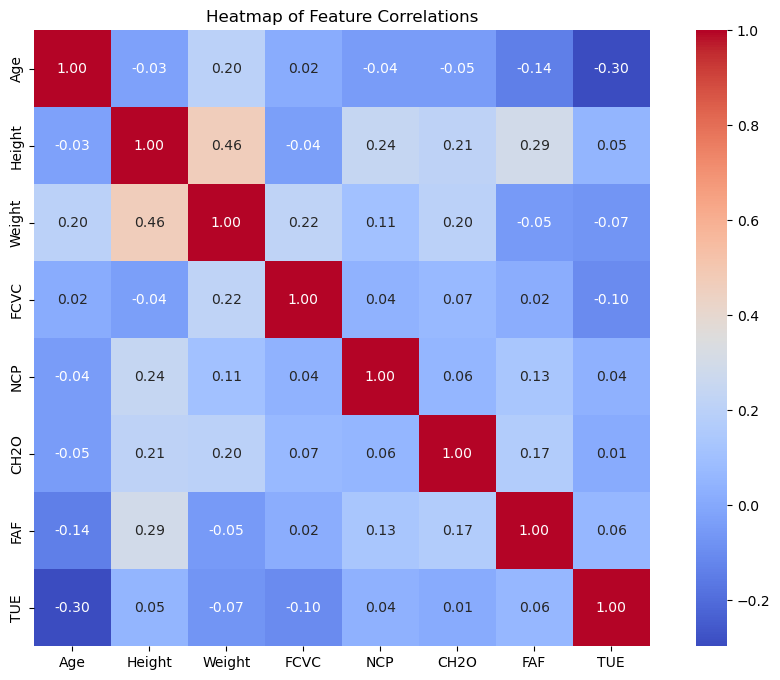

In [20]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Set title
plt.title('Heatmap of Feature Correlations')
plt.show()


In [9]:
# Separate features and target variable
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Encode categorical features and target variable
categorical_features = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_features}

for col in categorical_features:
    X[col] = label_encoders[col].fit_transform(X[col])

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Scale numerical features for better performance
numerical_features = X.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show a preview of the processed data
X_train.head(), y_train[:5]

(      Gender       Age    Height    Weight  family_history_with_overweight  \
 1930       0  0.263145 -0.791780  0.719595                               1   
 1803       0  0.265964 -0.486235  0.967996                               1   
 1198       1 -0.994977  0.519063 -0.008169                               1   
 15         0 -0.364507 -0.017981 -0.786178                               1   
 816        1 -0.135710 -0.337151 -0.442470                               1   
 
       FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
 1930     1  1.088342  0.404153     2      0 -0.860402    0 -1.072747   
 1803     1  1.088342  0.404153     2      0  1.249987    0 -1.188039   
 1198     1  0.914235  0.404153     2      0  1.195866    0  0.246392   
 15       0  1.088342  0.404153     0      0 -0.013073    1  1.163820   
 816      1 -0.785019  0.404153     2      0 -0.013073    0 -1.036152   
 
            TUE  CALC  MTRANS  
 1930  0.009242     2       3  
 1803 -0.853256     

In [10]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_dict = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Create a DataFrame for the classification report and add accuracy as a separate row
classification_report_df = pd.DataFrame(classification_report_dict).transpose()
classification_report_df.loc['accuracy'] = [accuracy, '', '', '']

classification_report_df


,precision,recall,f1-score,support
Insufficient_Weight,0.987952,0.953488,0.970414,86.0
Normal_Weight,0.825243,0.913978,0.867347,93.0
Obesity_Type_I,0.980000,0.960784,0.970297,102.0
Obesity_Type_II,0.966667,0.988636,0.977528,88.0
Obesity_Type_III,1.000000,0.989796,0.994872,98.0
Overweight_Level_I,0.892857,0.852273,0.872093,88.0
Overweight_Level_II,0.961039,0.936709,0.948718,79.0
accuracy,0.943218,,,
macro avg,0.944822,0.942238,0.943038,634.0
weighted avg,0.945160,0.943218,0.943694,634.0


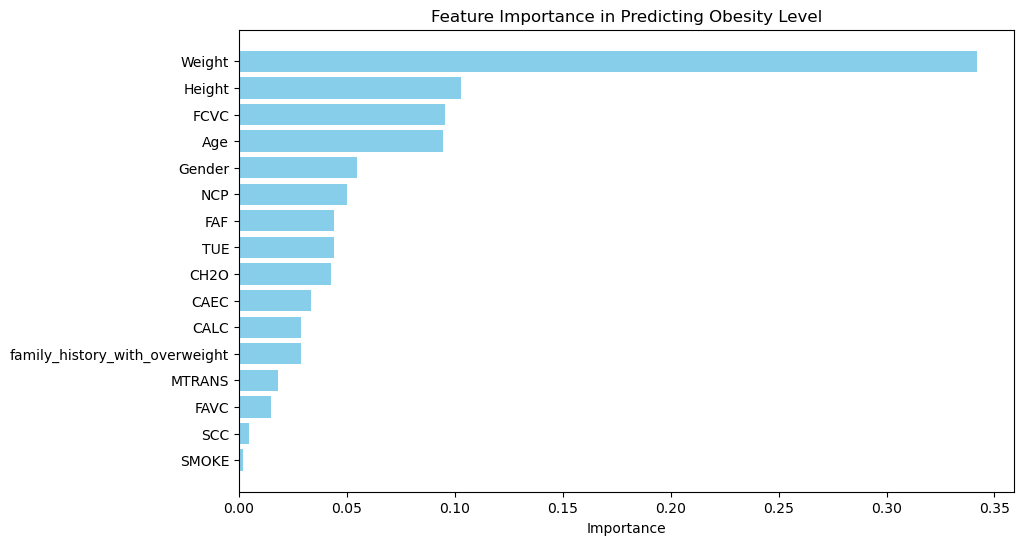

[('Weight', 0.3419482586866212),
 ('Height', 0.10288016231036952),
 ('FCVC', 0.0952533801156596),
 ('Age', 0.09450663017707144),
 ('Gender', 0.05472528703107653),
 ('NCP', 0.050081257577298956),
 ('FAF', 0.044103612900997104),
 ('TUE', 0.04393874902065158),
 ('CH2O', 0.04259229228349576),
 ('CAEC', 0.03334983377385891)]

In [11]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting Obesity Level")
plt.gca().invert_yaxis()
plt.show()

# Display top features with their importance values
top_features = list(zip(sorted_feature_names, sorted_feature_importances))
top_features[:10]  # Display the top 10 features and their importance values


In [12]:
# Define models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting (LightGBM)": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(random_state=42, max_iter=300)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Display sorted results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
sorted_results

Random Forest Accuracy: 0.9432


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vijai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

Logistic Regression Accuracy: 0.8659
K-Nearest Neighbors Accuracy: 0.8218
Support Vector Machine Accuracy: 0.9085


C:\Users\vijai\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Accuracy: 0.9511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 1477, number of used features: 16
[LightGBM] [Info] Start training from score -2.072022
[LightGBM] [Info] Start training from score -2.029910
[LightGBM] [Info] Start training from score -1.780315
[LightGBM] [Info] Start training from score -1.955434
[LightGBM] [Info] Start training from score -1.877233
[LightGBM] [Info] Start training from score -1.989501
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Gradient Boosting (LightGBM)': 0.9621451104100947,
 'Gradient Boosting (XGBoost)': 0.9511041009463722,
 'Random Forest': 0.943217665615142,
 'Neural Network (MLP)': 0.9369085173501577,
 'Decision Tree': 0.9148264984227129,
 'Support Vector Machine': 0.9085173501577287,
 'Logistic Regression': 0.8659305993690851,
 'K-Nearest Neighbors': 0.8217665615141956,
 'Naive Bayes': 0.6056782334384858}

Random Forest Accuracy: 0.9448, Sensitivity: 0.9462


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vijai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

Logistic Regression Accuracy: 0.8612, Sensitivity: 0.6237
K-Nearest Neighbors Accuracy: 0.8312, Sensitivity: 0.4839
Support Vector Machine Accuracy: 0.9054, Sensitivity: 0.8172


C:\Users\vijai\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Accuracy: 0.9606, Sensitivity: 0.8710
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 1743, number of used features: 16
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

C:\Users\vijai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network (MLP) Accuracy: 0.9353, Sensitivity: 0.8495


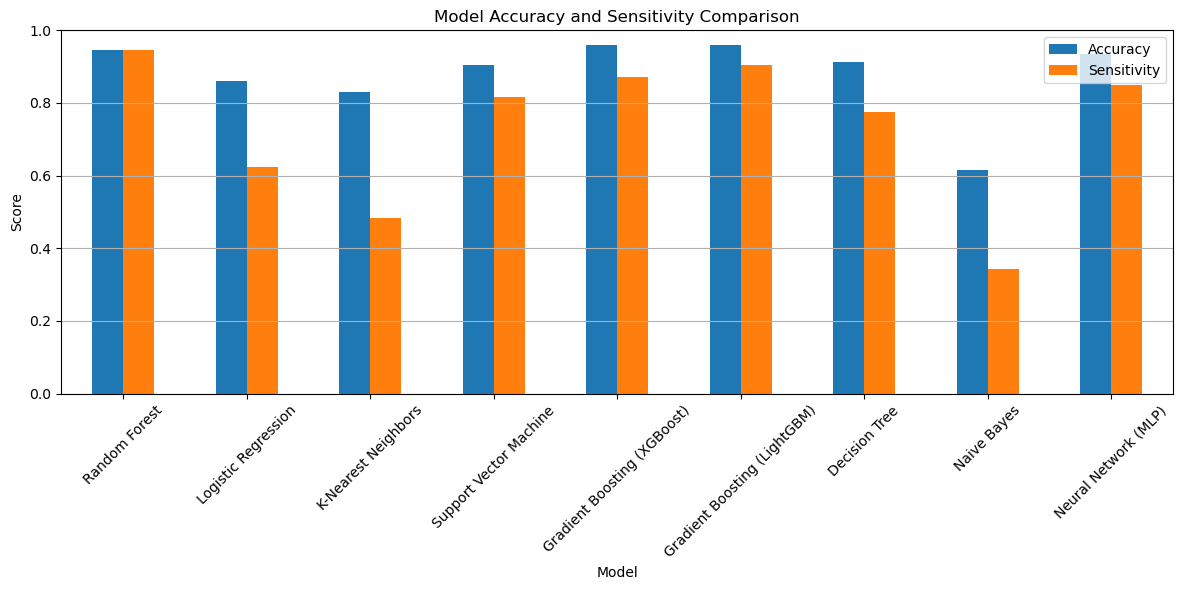

,Model,Accuracy,Sensitivity
4,Gradient Boosting (XGBoost),0.960568,0.870968
5,Gradient Boosting (LightGBM),0.960568,0.903226
0,Random Forest,0.944795,0.946237
8,Neural Network (MLP),0.935331,0.849462
6,Decision Tree,0.913249,0.774194
3,Support Vector Machine,0.905363,0.817204
1,Logistic Regression,0.861199,0.623656
2,K-Nearest Neighbors,0.831230,0.483871
7,Naive Bayes,0.616719,0.344086


In [13]:
# Define models to test 
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting (LightGBM)": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(random_state=42, max_iter=300)
}

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate each model
results = {}
sensitivity = {}
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)  # Train on the resampled dataset
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Calculate sensitivity (recall)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    sensitivity[model_name] = class_report['1']['recall']  # Assuming '1' is the positive class

    print(f"{model_name} Accuracy: {accuracy:.4f}, Sensitivity: {sensitivity[model_name]:.4f}")

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values()),
    'Sensitivity': list(sensitivity.values())
})

# Plotting the lift plot
results_df.set_index('Model')[['Accuracy', 'Sensitivity']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Accuracy and Sensitivity Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(['Accuracy', 'Sensitivity'])
plt.tight_layout()
plt.show()

# Display sorted results
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)
sorted_results


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


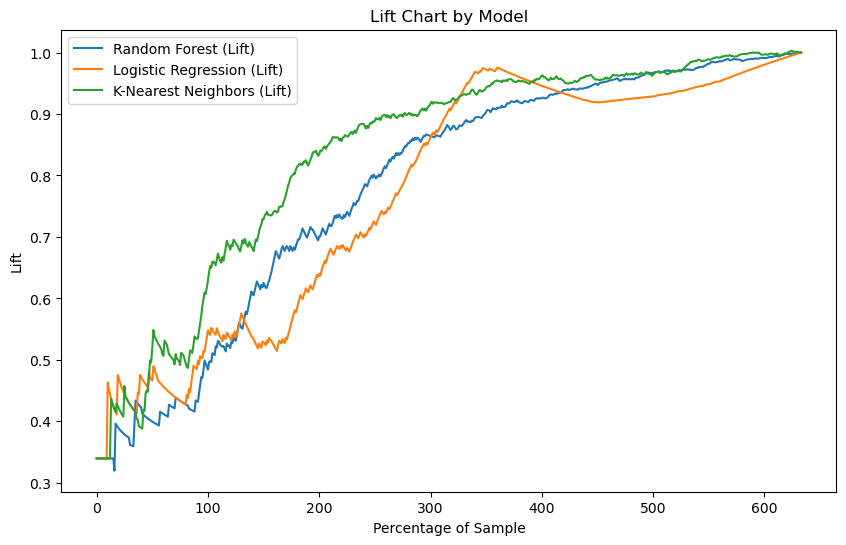

In [14]:
# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train each model and get prediction probabilities
model_probs = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_probs[model_name] = model.predict_proba(X_test)

# Function to compute lift chart values
def lift_chart(y_true, y_probs, model_name):
    # Sort true labels by model probability in descending order for the positive class
    sorted_indices = np.argsort(-y_probs[:, 1])
    sorted_true = y_true[sorted_indices]

    # Calculate cumulative true positive rate
    cumulative_true_positive_rate = np.cumsum(sorted_true) / np.sum(sorted_true)
    lift = cumulative_true_positive_rate / (np.arange(1, len(y_true) + 1) / len(y_true))

    # Plot lift chart
    plt.plot(lift, label=f'{model_name} (Lift)')
    plt.xlabel("Percentage of Sample")
    plt.ylabel("Lift")
    plt.title("Lift Chart by Model")
    plt.legend()

# Plot lift chart for each model
plt.figure(figsize=(10, 6))
for model_name, probs in model_probs.items():
    lift_chart(y_test, probs, model_name)

plt.show()

C:\Users\vijai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vijai\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 1477, number of used features: 16
[LightGBM] [Info] Start training from score -2.072022
[LightGBM] [Info] Start training from score -2.029910
[LightGBM] [Info] Start training from score -1.780315
[LightGBM] [Info] Start training from score -1.955434
[LightGBM] [Info] Start training from score -1.877233
[LightGBM] [Info] Start training from score -1.989501
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

C:\Users\vijai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


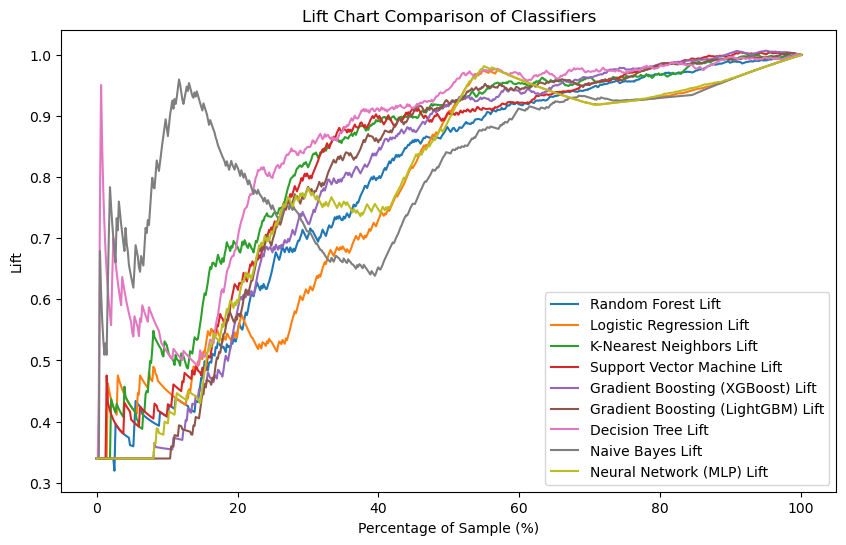

In [15]:
# Define the models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting (LightGBM)": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(random_state=42, max_iter=300)
}

# Function to calculate lift for a model's probabilities
def calculate_lift(y_true, y_probs):
    # Sort by probability, descending
    sorted_indices = np.argsort(-y_probs)
    sorted_true = y_true[sorted_indices]
    
    # Cumulative true positive rate
    cumulative_true_positive_rate = np.cumsum(sorted_true) / np.sum(sorted_true)
    
    # Calculate lift
    lift = cumulative_true_positive_rate / (np.arange(1, len(y_true) + 1) / len(y_true))
    
    return lift

# Plot lift chart for each model
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    lift = calculate_lift(y_test, y_probs)
    
    # Plot lift chart
    plt.plot(np.linspace(0, 100, len(lift)), lift, label=f'{model_name} Lift')

# Chart formatting
plt.xlabel("Percentage of Sample (%)")
plt.ylabel("Lift")
plt.title("Lift Chart Comparison of Classifiers")
plt.legend()
plt.show()

In [16]:
def predict_obesity_level(model, patient_data, label_encoders, scaler, target_encoder):
    # Ensure the patient data is in a DataFrame for consistent processing
    patient_df = pd.DataFrame([patient_data], columns=X.columns)

    # Encode categorical features
    for col, le in label_encoders.items():
        patient_df[col] = le.transform(patient_df[col])

    # Scale numerical features
    patient_df[numerical_features] = scaler.transform(patient_df[numerical_features])

    # Predict obesity level
    prediction_encoded = model.predict(patient_df)[0]
    
    # Decode the prediction to get the original label
    prediction_label = target_encoder.inverse_transform([prediction_encoded])[0]
    
    return prediction_label

In [17]:
new_patient_data = {
    "Gender": "Male",
    "Age": 25.0,
    "Height": 1.75,
    "Weight": 80.0,
    "family_history_with_overweight": "yes",
    "FAVC": "yes",
    "FCVC": 2.0,
    "NCP": 3.0,
    "CAEC": "Frequently",
    "SMOKE": "no",
    "CH2O": 2.0,
    "SCC": "yes",
    "FAF": 1.0,
    "TUE": 0.5,
    "CALC": "Sometimes",
    "MTRANS": "Public_Transportation"
}

# Convert new patient data into a format the model can process
predicted_obesity_level = predict_obesity_level(rf_model, new_patient_data, label_encoders, scaler, target_encoder)

print(f"The predicted obesity level for the patient is: {predicted_obesity_level}")

The predicted obesity level for the patient is: Overweight_Level_II


In [18]:
# Finding total number of entries in the dataset
print(f"Total number of entries in the dataset: {data.shape[0]}")

Total number of entries in the dataset: 2111


In [21]:
# Entries added across all SMOTE applications
X_resampled1, y_resampled1 = smote.fit_resample(X_train, y_train)
X_resampled2, y_resampled2 = smote.fit_resample(X_train, y_train)
total_added_entries = (X_resampled1.shape[0] - X_train.shape[0]) + (X_resampled2.shape[0] - X_train.shape[0])
print(f"Total entries added across all SMOTE applications: {total_added_entries}")

Total entries added across all SMOTE applications: 532


In [23]:
# Comparing accuracy after and before SMOTE
model_without_smote = RandomForestClassifier(random_state=42)
model_without_smote.fit(X_train, y_train)

y_test_pred_without_smote = model_without_smote.predict(X_test)
accuracy_without_smote = accuracy_score(y_test, y_test_pred_without_smote)

print("Accuracy before applying SMOTE:", accuracy_without_smote)
print("\nClassification Report before applying SMOTE:")
print(classification_report(y_test, y_test_pred_without_smote))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_with_smote = RandomForestClassifier(random_state=42)
model_with_smote.fit(X_resampled, y_resampled)

y_test_pred_with_smote = model_with_smote.predict(X_test)
accuracy_with_smote = accuracy_score(y_test, y_test_pred_with_smote)

print("\nAccuracy after applying SMOTE:", accuracy_with_smote)
print("\nClassification Report after applying SMOTE:")
print(classification_report(y_test, y_test_pred_with_smote))

print("\nComparison:")
print(f"Accuracy before SMOTE: {accuracy_without_smote:.4f}")
print(f"Accuracy after SMOTE: {accuracy_with_smote:.4f}")

Accuracy before applying SMOTE: 0.943217665615142

Classification Report before applying SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634


Accuracy after applying SMOTE: 0.944794952681388

Classification Report after applying SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.81      0.95      0.88        93
           2       0.98      0.96      0.97      